### Directing customers to subscription through app behavior analysis dataset

#### Objective :
The main objective of the model is to predict which user will not subscribe to the paid membership, so that greater marketing efforts can go into trying to 'convert' them into paid users.

### About the dataset
1. user -> user_id
2. first_open -> user first time open the app
3. dayofweek -> sunday(0) to saturday(6)
4. hour -> time
5. age -> age
6. screen_list -> List every single screen name that user has visited in first 24 hrs
7. numscreens -> number of screen that appears in screen list
8. minigame -> if user play this game in first 24 hrs it will store as '1' else '0'
9. used_premium_feature -> if a user used only free feature and never used any premium feature then it is '0' else '1'
10. enrolled -> if user enrolled to any paid products it store as '1' else '0'
11. enrolled_date -> if enrolled
12. liked -> if user liked any feature then it store as '1' else '0'

In [37]:
#inporting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

#### Download Dataset
link -> https://drive.google.com/uc?export=download&id=1B1W303V3cBexAwf5Bw0H13IqM4gYwz3J

In [38]:
#loading the dataset
dataset = pd.read_csv("appdata.csv")
dataset.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [39]:
# take overview of null values
dataset.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

All columns contain 0 null value except enrolled_date. The enrolled_date column has total 18926 null values.

In [40]:
# brief inforamtion about Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


We can see in the output provided by DataFrame.info() method, there are 50,000 entries (rows) from 0 to 49999 and a total of 12 columns.

All columns have 50,000 non-null values except enrolled_date. It has 31,074 non-null. There is a total of 8 columns that contain 
integer 64 bit (int64) values and the remaining 4 are object type.

In [41]:
# give the distribution of numerical variables
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


From the output, we can know more about the dataset. The mean age of the customer is 31.72. Only 10.7% of customers played minigame and 17.2% customer used premium features of the app, likes 16.5 %. The 62.1% customer enrolled in the premium app.

In [42]:
#  hour data convert string to int
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [43]:
# get data type of each columns
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [44]:
# drop object dtype columns
dataset2 = dataset.copy().drop(columns = ['user','screen_list','enrolled_date','first_open'])
# head of numeric dataFrame
dataset2.head(5)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


To visualize the data need numeric values for that we drop some columns that datatype is the object.

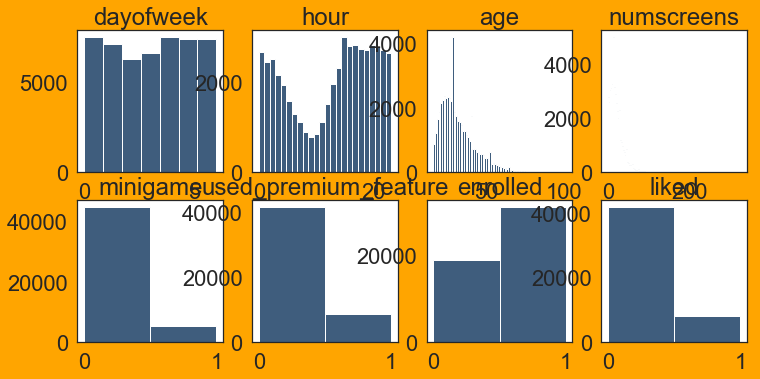

In [45]:
# plot histogram 
plt.suptitle('Histograms of numerical columns', fontsize=10)
plt.figure(figsize=(12,12),facecolor='orange',edgecolor='blue')
for i in range(1, dataset2.shape[1]+ 1):
    plt.subplot(4, 4, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = '#3F5D7D')

1. In the above histogram, we can see minigame, used_primium_feature, enrolled, and like they have only two values and how they distributed.
2. The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app.
3. The histogram of ‘hour’ shows the less customer register on the app around 10 AM.
4. The ‘age’ histogram shows, the maximum customers are younger.
5. The ‘numsreens’ histogram shows the few customers saw more than 50 screens.

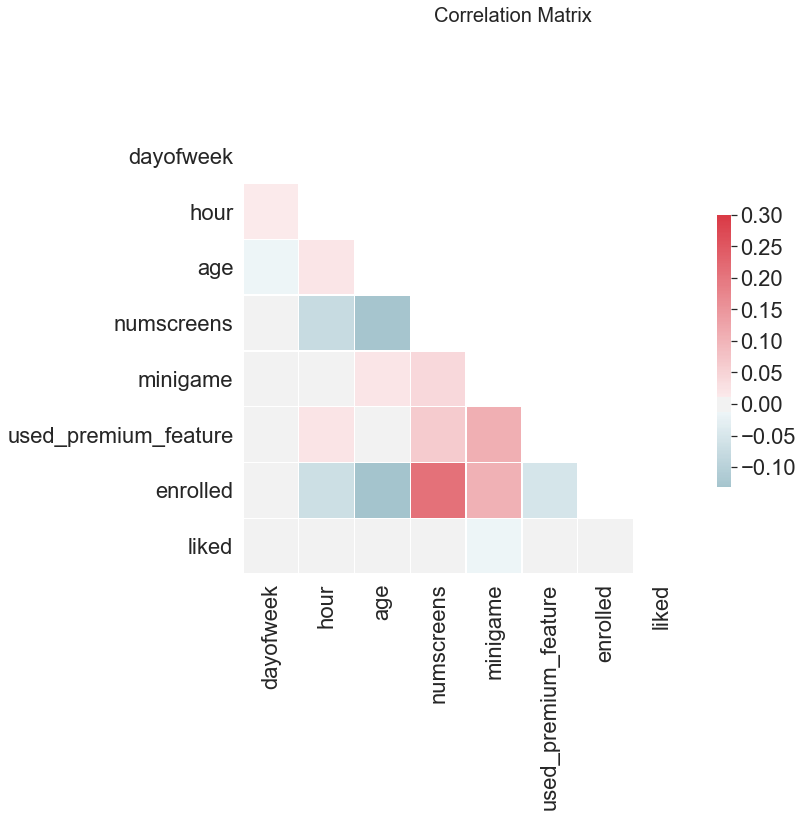

In [46]:
#Heatmap uses to find the correlation between each and every features using the correlation matrix.
sns.set(style = "white", font_scale = 2) 

corr = dataset2.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10,10))
f.suptitle('Correlation Matrix', fontsize = 20)

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,square = True,
           linewidths = .5, cbar_kws = {"shrink" : .5})

In the dataset, there is no strong correlation between any features. There is little correlation between ‘numscreens’ and ‘enrolled’. It means that those customers saw more screen they are taking premium app. There is a slight correlation between ‘minigame’ with ‘anrolled’ and ‘used_premium_feature’. The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’. It means that older customers do not use the premium app and they don’t see multiple screens.

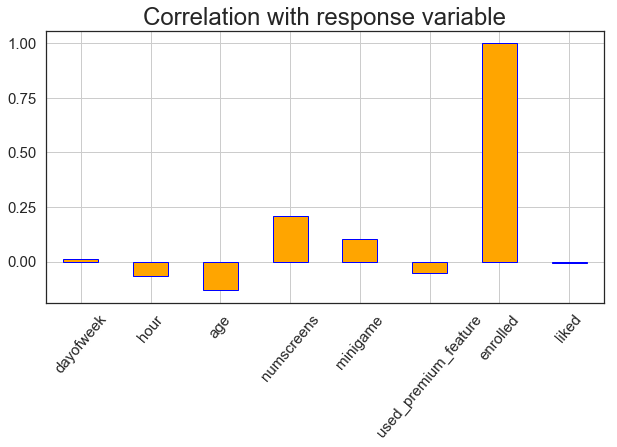

In [47]:
#show corelation barplot 
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (10, 5),
                                             title = 'Correlation with response variable', fontsize = 15, 
                                             facecolor='orange', edgecolor='blue', rot = 50, grid = True)

1. We saw the heatmap correlation matrix but this was not showing correlation clearly but you can easily understand which feature is how much correlated with ‘enrolled’ feature using the above barplot.
2. The ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.
3. The ‘hour’, ‘age’ and ‘used_premium_feature’ are strongly negatively correlated with the ‘enrolled’ feature.

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


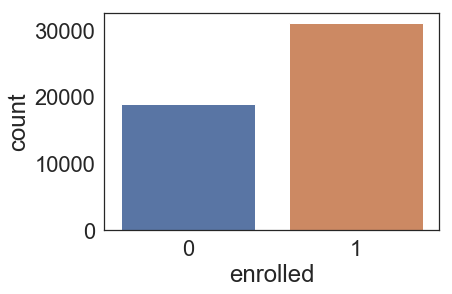

In [48]:
# Show counterplot of 'enrolled' feature
sns.countplot(dataset.enrolled)
# value enrolled and not enrolled customers
print("Not enrolled user = ", (dataset.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(dataset.enrolled < 1).sum(),  "out of 50000")

Here we can see the exact value of enrolled & not enrolled customers

In [49]:
# parsinf object data into data time format
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [50]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

We are finding how much time the customer takes to get enrolled in the premium feature app after registration. For that subtract ‘dataset.first_open’ from ‘dataset.enrolled_date’ and set data type as timedelta64 in hours.

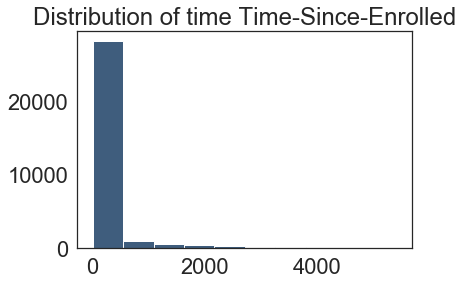

In [51]:
# histogram
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D')
plt.title('Distribution of time Time-Since-Enrolled')
plt.show()

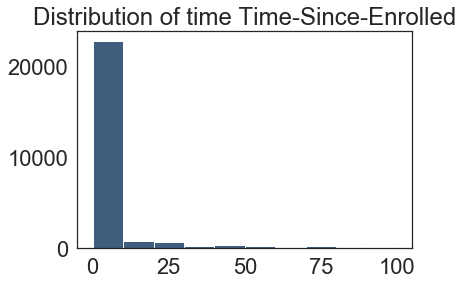

In [52]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D', range = [0, 100])
plt.title('Distribution of time Time-Since-Enrolled')
plt.show()

In the above histogram, we know the maximum customers have enrolled the app in 10 hours from the registration.

In [53]:
#considering those customers have enrolled after 48 hours as 0.
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns = ['difference','first_open', 'enrolled_date'])

Drop some ‘time_to_enrolled’, ‘enrolled_date’, ‘first_open’ feature they are not strongly correlated to the result.

In [54]:
# dataset link -> https://drive.google.com/uc?export=download&id=1bLtnYrDFZ-sRa9EKDZjOEScd6qXcaEyU
top_screens = pd.read_csv("top_screens.csv").top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

The ‘Screen_list’ contains string values but we can’t use it directly. So to solve this problem we are taking each screen name from ‘top_screen’ and append as a column by the same name to ‘dataset’. Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.

In [55]:
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",","")
    
dataset["other"] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ["screen_list"])

All the saving screens correlated with each other that’s we are taking the sum of all saving screens in each row and store in a single row for all customers.

In [56]:
savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10",
                  ]
dataset["SavingsCount"] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)

In [57]:
cm_screens = ["Credit1",
              "Credit2",
              "Credit3",
              "Credit3Container",
              "Credit3Dashboard"
              ]
dataset["CMCount"] = dataset[cm_screens].sum(axis = 1)
dataset = dataset.drop(columns = cm_screens)

In [58]:
cc_screens = ["CC1",
              "CC1Category",
              "CC3"
              ]
dataset["CCCount"] = dataset[cc_screens].sum(axis = 1)
dataset = dataset.drop(columns = cc_screens)

In [59]:
loan_screens = ["Loan",
              "Loan2",
              "Loan3",
              "Loan4"
              ]
dataset["LoansCount"] = dataset[loan_screens].sum(axis = 1)
dataset = dataset.drop(columns = loan_screens)

similarly for credit, CC1 and loan screens.

In [60]:
dataset.to_csv('new_app.csv')
dataset.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [61]:
# Machine Learning Model Building next notebook